In [14]:
import math,os,glob,h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd

In [12]:
path="/eos/user/d/ding/Xbb_New/Dijets/361030.hbbTraining.e3569_s3126_r9364_p3990.2019_pub.hbbTag_v1_N.20672830._000003.output.h5"
load_file=h5py.File(path,'r')
#h1=pd.read_hdf(path,"subjet_VRGhostTag_1")
print load_file
for i in load_file.keys():
    print i

<HDF5 file "361030.hbbTraining.e3569_s3126_r9364_p3990.2019_pub.hbbTag_v1_N.20672830._000003.output.h5" (mode r)>
errors
fat_jet
metadata
subjet_FR_1
subjet_FR_2
subjet_FR_3
subjet_VRGhostTag_1
subjet_VRGhostTag_2
subjet_VRGhostTag_3
subjet_VR_1
subjet_VR_2
subjet_VR_3


In [15]:
path="./Reduced/tot.h5"
load_file=h5py.File(path,'r')
predict=load_file.get("data")
print predict.shape
predict=np.reshape(predict,(predict.shape[0],predict.shape[1]))
predict=predict[predict[:,-1]==0]
print predict.shape
#predict=predict[(predict[:,3]<=138.) & (predict[:,3]>=84.)] #loose
#predict=predict[(predict[:,4]<=500.) & (predict[:,4]>=250.)]

(60819196, 12)
(58675398, 12)


1
2
3


/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in power


4


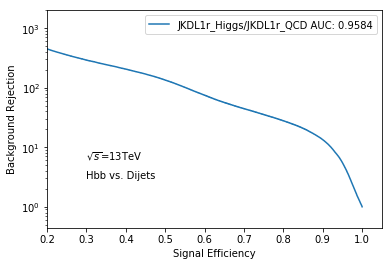

In [16]:
y=predict[:,-2]
w=predict[:,0]

print "1"
JKDL1rScoreHiggs=predict[:,7]
JKDL1rScoreTop=predict[:,8]
JKDL1rScoreQCD=predict[:,6]
JKDL1r=np.true_divide(JKDL1rScoreHiggs,JKDL1rScoreQCD)
#JKDL1r=np.true_divide(JKDL1rScoreHiggs,(JKDL1rScoreQCD+JKDL1rScoreTop))
JKDL1r=np.nan_to_num(JKDL1r)
JKDL1r_bkg,JKDL1r_signal,JKDL1r_thres=roc_curve(y,JKDL1r,sample_weight=w)

print "2"
AUC_JKDL1r=roc_auc_score(y, JKDL1r,sample_weight=w)
print "3"



plt.plot(JKDL1r_signal,np.power(JKDL1r_bkg,-1.0),label="JKDL1r_Higgs/JKDL1r_QCD "+"AUC: "+str(AUC_JKDL1r)[0:6])
#plt.plot(Xbb_signal,np.power(Xbb_bkg,-1.0),label="Xbb_Higgs/Xbb_QCD "+"AUC: "+str(AUC_Xbb)[0:6])
print "4"
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.yscale("log", nonposy="clip")
plt.xlim(left=0.2)
plt.ylim(top=1e3*2)
#plt.ylim(bottom=0)
plt.legend(loc='best')
plt.text(0.3,1.5e1*0.4,r'$\sqrt{s}$=13TeV')
plt.text(0.3,1.5e1*0.2,r'Hbb vs. Dijets')
#plt.text(0.3,1.5e1*0.2,r'Hbb vs. Top')
ROC_file="figures/"+"Roc_CalibrationSample_QCD.pdf"
ROC_file1=ROC_file.replace("pdf","jpg")
#plt.savefig(ROC_file1)
#plt.savefig(ROC_file)
plt.show()

In [19]:
ROC_file2=ROC_file.replace("pdf","png")
plt.savefig(ROC_file1,dpi=500,bbox_inches = 'tight')
plt.savefig(ROC_file,dpi=500,bbox_inches = 'tight')
plt.savefig(ROC_file2,dpi=500,bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

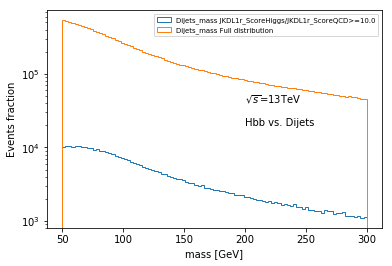

In [6]:
predict=predict[predict[:,0]==1]
predict_JKDL1r=predict[np.true_divide(predict[:,5],predict[:,4])>=10]
bins = np.linspace(50, 300, 100)
plt.figure(1)
plt.hist(predict_JKDL1r[:,2],bins=bins,label="Dijets_mass JKDL1r_ScoreHiggs/JKDL1r_ScoreQCD>=10.0",histtype="step")
plt.hist(predict[:,2],bins=bins,label="Dijets_mass Full distribution",histtype="step")

plt.legend(loc='upper right', fontsize="x-small")
plt.yscale("log", nonposy="clip")
plt.xlabel("mass [GeV]")
plt.ylabel("Events fraction")
#plt.ylim(top=0.6)
plt.text(200,1e5*0.4,r'$\sqrt{s}$=13TeV')
plt.text(200,1e5*0.2,r'Hbb vs. Dijets')
#plt.text(75,0.01*0.4,r'Hbb vs. Top')
ROC_file="figures/"+"Jetmass_CalibrationSample_QCD.pdf"
ROC_file1=ROC_file.replace("pdf","jpg")
plt.savefig(ROC_file1)
plt.savefig(ROC_file)
plt.show()